# Singular Value Decomposition

In [1]:
import os
import numpy as np
import pandas as pd
import scipy
from sklearn.decomposition import PCA
from matplotlib.image import imread
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14,8]

In [2]:
path = r'E:\1MS\Projects\SVD_PCA'
os.chdir(path)

In [3]:
# Helper functions:

def gs(x, r=False):
    ''' This function prints or returns the shape of given array '''
    if r:
        return np.shape(x)
    print(np.shape(x))
    
def get_source(lib):
    ''' This function prints the source code of required library '''
    
    import inspect
    print(inspect.getsource(lib))
    
def plot_explained_variance(reqd_pc_var, sing_vals):
    ''' 
        This functions plots the variance against number of singular vectors.
        It also returns the no. of SVs where we get our desired % of variance 
    '''
    x = np.arange(0, 1000)
    f = np.full((np.shape(sing_vals)[0],), reqd_pc_var)
    explained_variance_ = (sing_vals ** 2) / (sing_vals.shape[0] - 1)
    total_var = explained_variance_.sum()
    explained_variance_ratio_ = explained_variance_ / total_var
    gg = np.cumsum(explained_variance_ratio_)
    plt.plot(gg, '-')

    idx = np.argwhere(np.diff(np.sign(f - gg))).flatten()
    plt.plot(x[idx], f[idx], 'ro')
    sing_vecs = x[idx][0]
    plt.text(x[idx], f[idx], f'{reqd_pc_var * 100}% variance can be explained using first {sing_vecs} SVs', fontsize=20)
    plt.title('Cumulative Variance')
    plt.ylabel('Proportion of Variance explained')
    plt.xlabel('Number of Singular vectors')
    plt.show()
    
    return sing_vecs


In [4]:
rgb_img = imread('goku.jpeg') # read input file into 3-D array

In [5]:
gray_img = np.mean(rgb_img, -1) # Convert to grayscale (3-D to 2-D array)

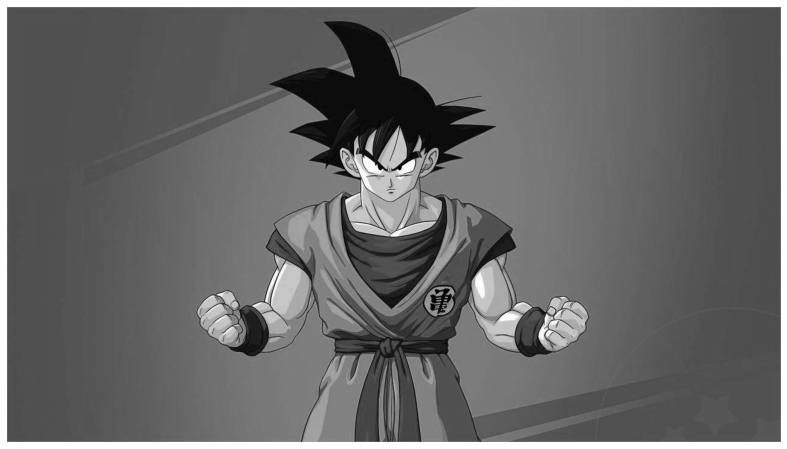

In [6]:
img = plt.imshow(gray_img)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [7]:
# Singular Value Decomposition
U, Si, VT = scipy.linalg.svd(gray_img - np.mean(gray_img, axis=0), full_matrices=False) # We make the data zero mean before SVD

In [8]:
# Printing sizes of input img, U, S, and VT
gs(gray_img)
gs(U)
gs(Si)
gs(VT)

(720, 1280)
(720, 720)
(720,)
(720, 1280)


In [9]:
S = np.diag(Si) # Converting the 1-D matrix to 2-D

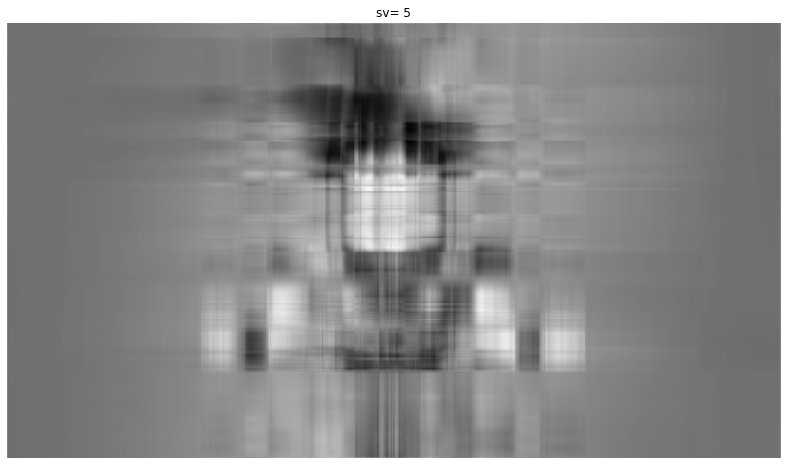

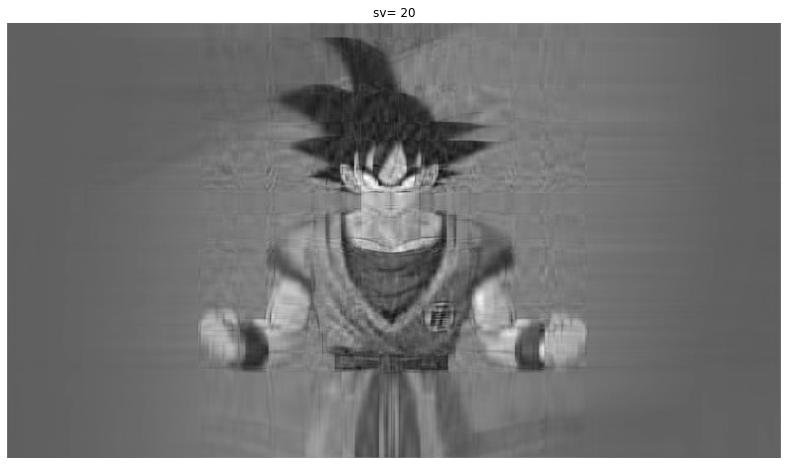

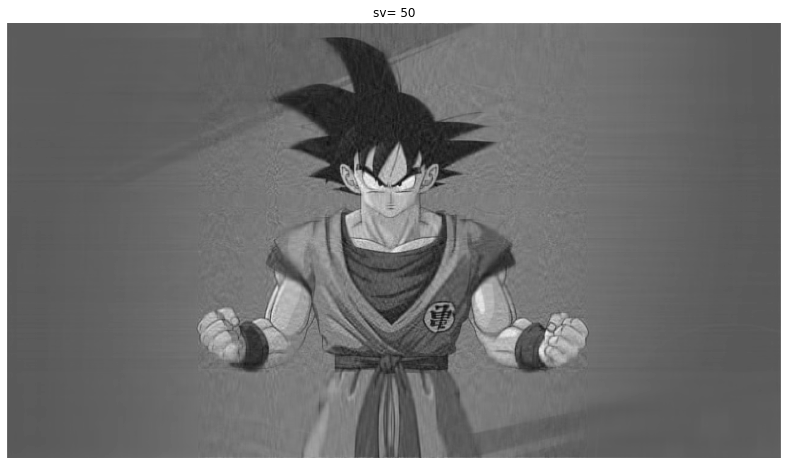

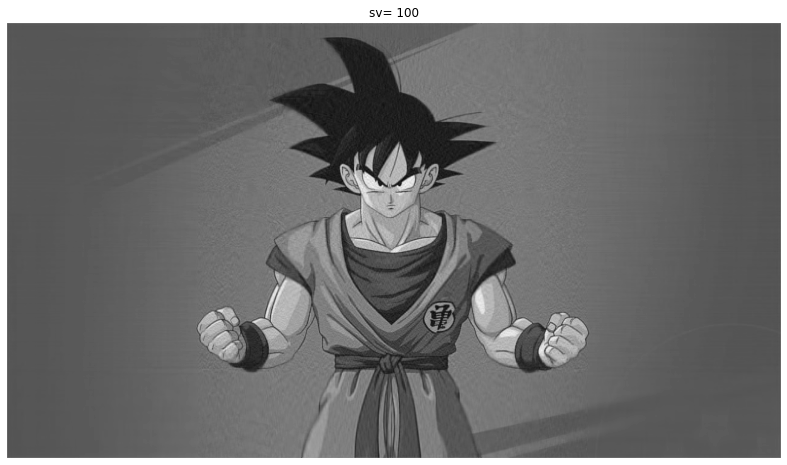

In [10]:
# Recreate image using different number of Singular vectors

for sv in (5, 20, 50, 100):
    rec = U[:, :sv] @ S[0:sv, :sv] @ VT[:sv, :] + np.mean(gray_img, axis=0)
    img = plt.imshow(rec)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title(f'sv= {sv}')
    plt.show()

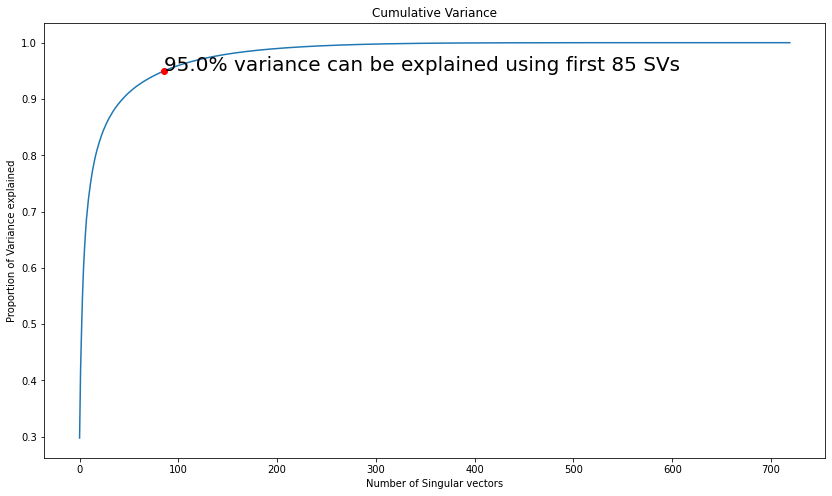

In [11]:
sing_vecs_svd = plot_explained_variance(0.95, Si)

### Reconstruction using first k SVs

In [12]:
recon_img_svd = U[:, :sing_vecs_svd] @ S[:sing_vecs_svd, :sing_vecs_svd]  @ VT[:sing_vecs_svd, :] + np.mean(gray_img, axis=0)

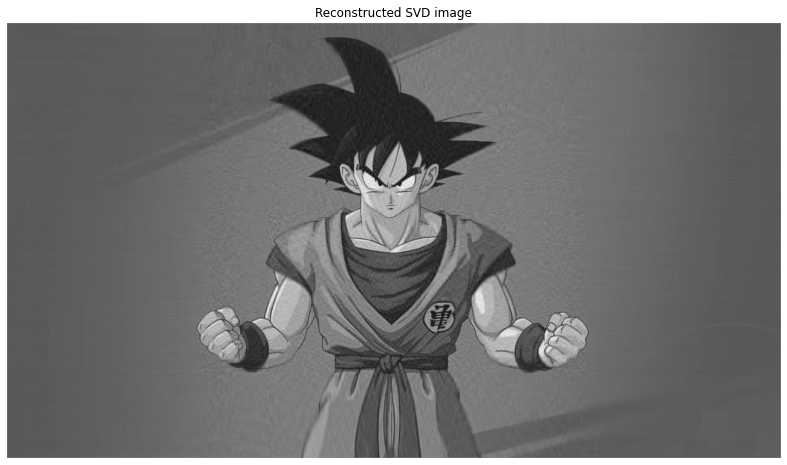

In [13]:
img = plt.imshow(recon_img_svd)    
img.set_cmap('gray')
plt.axis('off')
plt.title(f'Reconstructed SVD image')
plt.show()

#  


# Principal Component Analysis

sklearn.decomposition's PCA also uses scipy.linalg's svd. 
Thus, we expect to see similar results as above.

In [14]:
pca_ = PCA()
pca_PC = pca_.fit_transform(gray_img)
pca_sing_values = pca_.singular_values_
pca_vec = pca_.components_

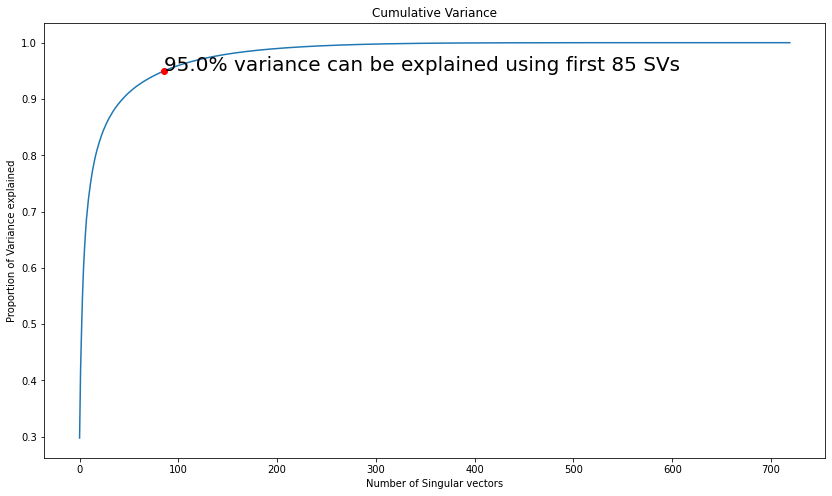

In [15]:
sing_vecs_pca = plot_explained_variance(0.95, pca_sing_values)

#### Thus, we verified, 95% variance of input data can be explained using first 85 SVs using PCA

### Reconstruction - PCA

In [16]:
recon_pca_img_0 = pca_PC[:, :sing_vecs_pca] @ pca_vec[:sing_vecs_pca, :]  + np.mean(gray_img, axis=0)

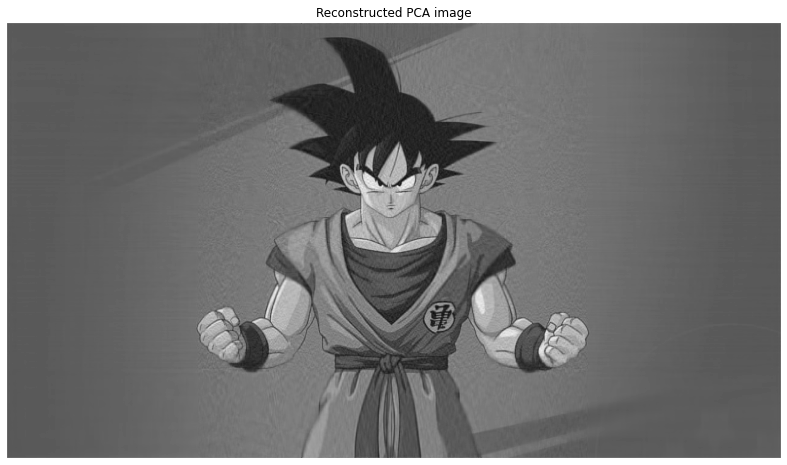

In [17]:
img = plt.imshow(recon_pca_img_0)    
img.set_cmap('gray')
plt.axis('off')
plt.title(f'Reconstructed PCA image')
plt.show()

### We can do the above task by directly inputting n_components as k (sing_vecs_pca)

In [18]:
# We will use the same no. of singular vectors as above.
pca = PCA(n_components=sing_vecs_pca)
PCs = pca.fit_transform(gray_img)
pca_ax = pca.components_

In [19]:
gs(PCs)
gs(pca_ax)

(720, 85)
(85, 1280)


In [20]:
recon_pca_img_1 = PCs @ pca_ax + np.mean(gray_img, axis=0)

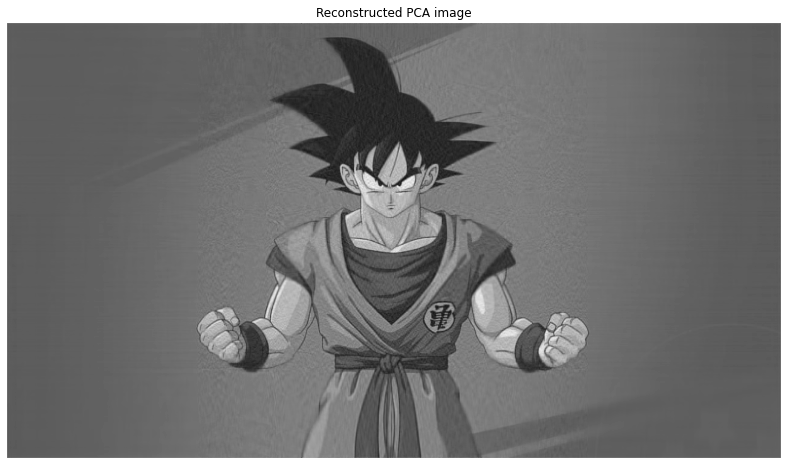

In [21]:
img = plt.imshow(recon_pca_img_1)    
img.set_cmap('gray')
plt.axis('off')
plt.title(f'Reconstructed PCA image')
plt.show()

## Math intuition:

- Singular Value Decomposition outputs - two orthogonals matrices U and VT, and a diagonal matrix S containing Singular values of input X ordered in decreasing order. 
- SVD(X) = U @ S @ VT         
  @ here is matrix multiplication.
- Selecting first k columns of U and first k rows and cols of S can give us the reduced matrix with required variance.
- Now, U[:, :k] @ S[:k, :k] does the same task as of PCA(n_components=k).fit_transform(X).
- On further multiplying U@S by VT, and pca's fit_transform output by pca.components_ , we are able to reconstruct the original  image from matrices of reduced rank (if k < no. of actual no. of cols).
- Note: PCA performs mean centering  by itself, while in our SVD, we manually make the input zero mean, and thus, in both cases we add the subtracted mean while reconstructing

- VT is nothing but the eigenvector matrix of the covariance of input X. 
  Cov of X can be  calculated as (X.T @ X)/(np.shape(X)[0] - 1)
  

#  